In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from seaborn import heatmap
import networkx as nx
import queue

# Initialization

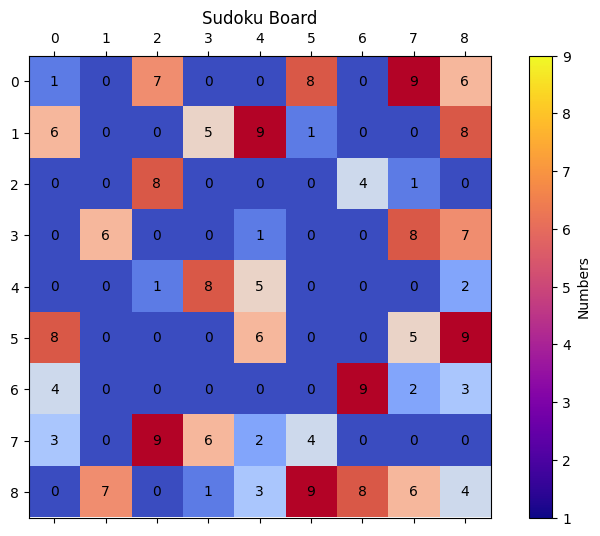

In [2]:
def showSudoku(board):
    ''' Display the Sudoku board with numbers and a colorbar
        Input : 2D NumPy array representing the Sudoku board
        Output : Display the Sudoku board with numbers and a colorbar
    '''
    fig, ax = plt.subplots(figsize=(10, 6))

    # Show Sudoku board with numbers
    ax.matshow(board, cmap='coolwarm')
    for i in range(9):
        for j in range(9):
            ax.text(j, i, str(board[i][j]), va='center', ha='center', color='black')

    ax.grid(visible=False)
    ax.set_title('Sudoku Board')

    # Create colorbar
    cmap = plt.cm.plasma
    norm = plt.Normalize(vmin=1, vmax=9)
    cb = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, ticks=np.arange(1, 10))
    cb.set_label('Numbers')
    cb.set_ticklabels(np.arange(1, 10))

    plt.show()
    
board = [
    [1,0,7,0,0,8,0,9,6],
    [6,0,0,5,9,1,0,0,8],
    [0,0,8,0,0,0,4,1,0],
    [0,6,0,0,1,0,0,8,7],
    [0,0,1,8,5,0,0,0,2],
    [8,0,0,0,6,0,0,5,9],
    [4,0,0,0,0,0,9,2,3],
    [3,0,9,6,2,4,0,0,0],
    [0,7,0,1,3,9,8,6,4]
]
showSudoku(board)

In [3]:
class SudokuGraph(object):
    ''' Class to represent a graph for Sudoku puzzle
        Construction: Using Edges
    '''
    def __init__(self):
        self.edges = {}

    def add_edge(self, node, neighbor):
        ''' Add an edge between two nodes '''
        if node in self.edges:
            self.edges[node].add(neighbor)
        else:
            self.edges[node] = {neighbor}

    def all_edges(self):
        ''' Get all edges in the graph '''
        return self.edges

    def neighbors(self, node):
        ''' Get neighbors of a node '''
        return self.edges[node]

In [4]:
def initialize_sudoku_graph(board):
    sudoku_graph = SudokuGraph()
    board_size = len(board)

    # Create nodes for each cell
    for i in range(board_size):
        for j in range(board_size):
            sudoku_graph.edges[(i, j)] = set()

    # Add edges between cells in the same row, column, and block
    for i in range(board_size):
        for j in range(board_size):
            for k in range(board_size):
                if k != j:
                    sudoku_graph.edges[(i, j)].add((i, k))  # Row
                if k != i:
                    sudoku_graph.edges[(i, j)].add((k, j))  # Column

            subgrid_size = int(board_size ** 0.5)
            start_row, start_col = subgrid_size * (i // subgrid_size), subgrid_size * (j // subgrid_size)
            for m in range(start_row, start_row + subgrid_size):
                for n in range(start_col, start_col + subgrid_size):
                    if m != i or n != j:
                        sudoku_graph.edges[(i, j)].add((m, n))  # Block

    return sudoku_graph

In [5]:
sudoku_graph = initialize_sudoku_graph(board)

In [19]:
sudoku_graph.all_edges()

{(0, 0): {(0, 1),
  (0, 2),
  (0, 3),
  (0, 4),
  (0, 5),
  (0, 6),
  (0, 7),
  (0, 8),
  (1, 0),
  (1, 1),
  (1, 2),
  (2, 0),
  (2, 1),
  (2, 2),
  (3, 0),
  (4, 0),
  (5, 0),
  (6, 0),
  (7, 0),
  (8, 0)},
 (0, 1): {(0, 0),
  (0, 2),
  (0, 3),
  (0, 4),
  (0, 5),
  (0, 6),
  (0, 7),
  (0, 8),
  (1, 0),
  (1, 1),
  (1, 2),
  (2, 0),
  (2, 1),
  (2, 2),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1)},
 (0, 2): {(0, 0),
  (0, 1),
  (0, 3),
  (0, 4),
  (0, 5),
  (0, 6),
  (0, 7),
  (0, 8),
  (1, 0),
  (1, 1),
  (1, 2),
  (2, 0),
  (2, 1),
  (2, 2),
  (3, 2),
  (4, 2),
  (5, 2),
  (6, 2),
  (7, 2),
  (8, 2)},
 (0, 3): {(0, 0),
  (0, 1),
  (0, 2),
  (0, 4),
  (0, 5),
  (0, 6),
  (0, 7),
  (0, 8),
  (1, 3),
  (1, 4),
  (1, 5),
  (2, 3),
  (2, 4),
  (2, 5),
  (3, 3),
  (4, 3),
  (5, 3),
  (6, 3),
  (7, 3),
  (8, 3)},
 (0, 4): {(0, 0),
  (0, 1),
  (0, 2),
  (0, 3),
  (0, 5),
  (0, 6),
  (0, 7),
  (0, 8),
  (1, 3),
  (1, 4),
  (1, 5),
  (2, 3),
  (2, 4),
  (2, 5),
  (3, 4),
  (4, 

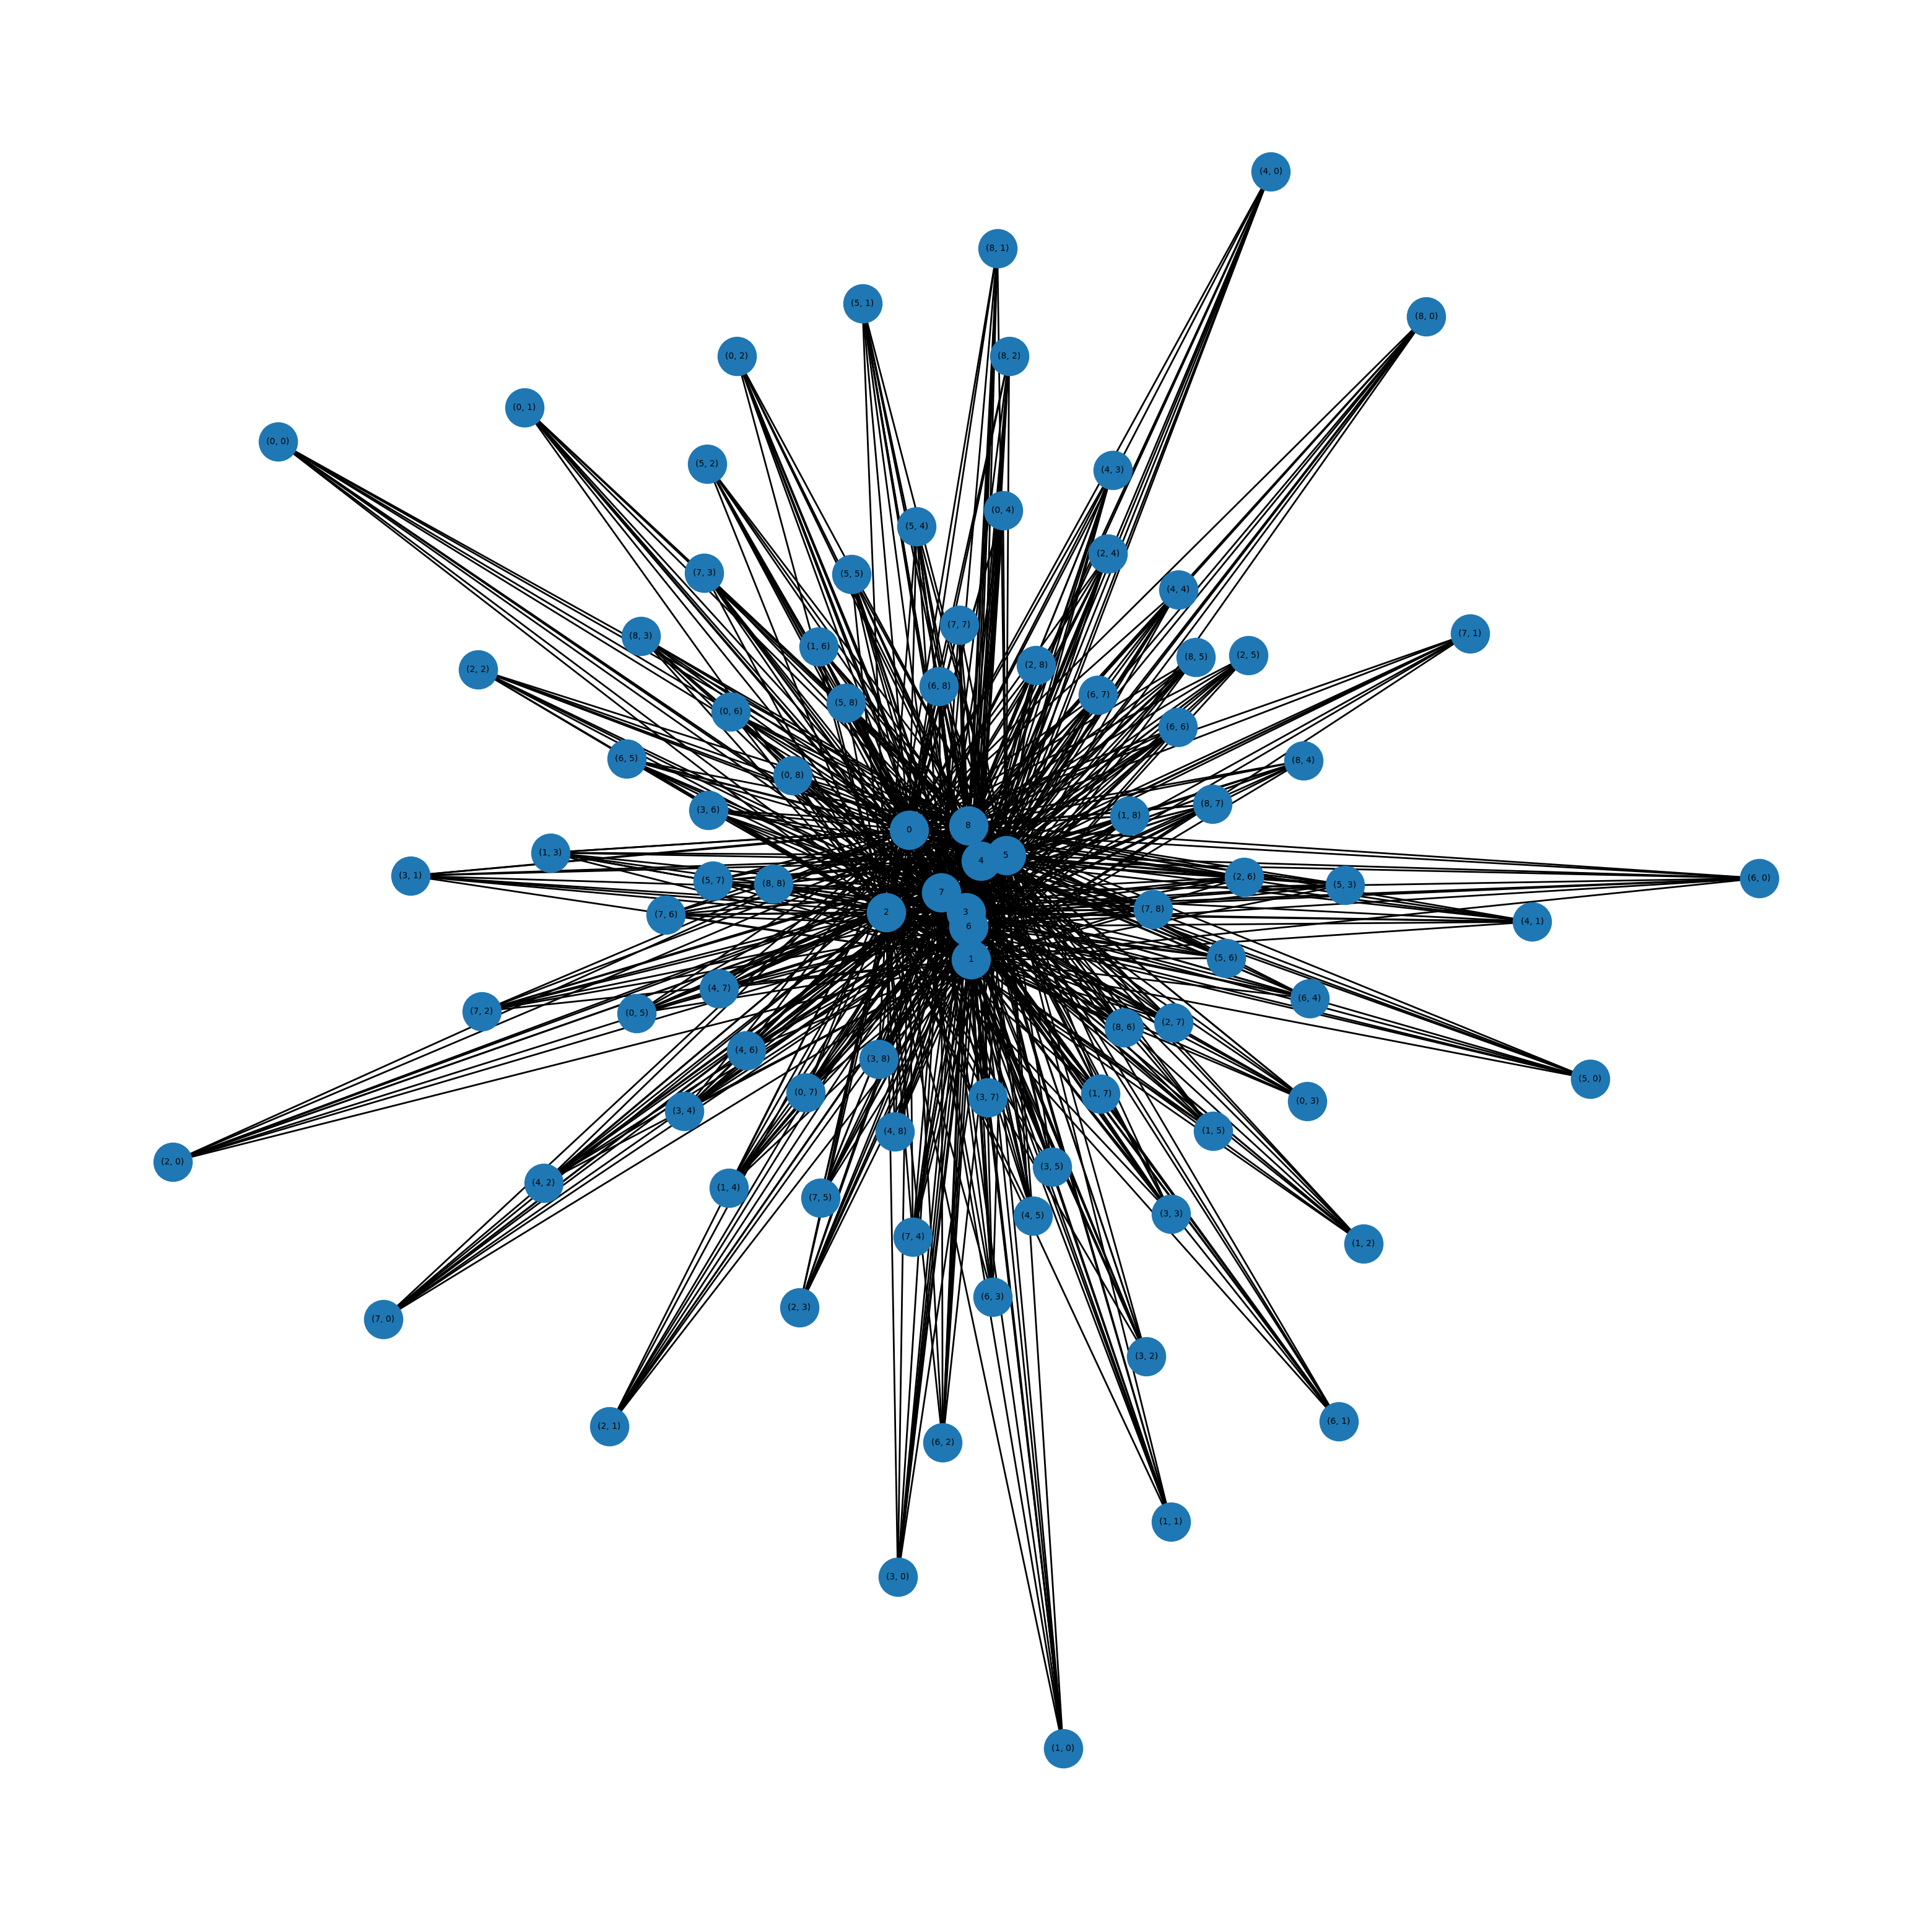

In [38]:
def showSudokuGraph(sudokuGraph):
    ''' Display a graph using networkx
        Input : MazeGraph from 2D maze
        Output : Input graph displayed
    '''
    edgeDict = sudokuGraph.all_edges()
    edgeList = []
    for node in edgeDict:
        for neighbor, weight in edgeDict[node]:
            edgeList.append((node,neighbor, {'weight': weight}))

    G = nx.Graph()
    G.add_edges_from(edgeList)

    f = plt.figure(figsize = (40,40))
    pos = nx.spring_layout(G)

    nx.draw_networkx_nodes(G, pos, node_size = 2000)
    nx.draw_networkx_edges(G, pos, width = 2)
    nx.draw_networkx_labels(G, pos, font_size = 10)

    plt.axis("off")
    plt.show()
showSudokuGraph(sudoku_graph)

# Helper Functions

In [72]:
def is_valid(num, edges, board):
    for edge in edges:
        if num == board[edge[0]][edge[1]]:
            return False
    return True

def find_empty_cell(board):
    # Find an empty cell (a cell with 0)
    for i in range(9):
        for j in range(9):
            if board[i][j] == 0:
                return i, j
    return None

def print_board(board):
    for row in board:
        print(row)

# Backtracking without constraint propagation

In [26]:
steps = 0
def solve_sudoku_backtracking(board, graph):
    global steps
    # Find an empty cell
    empty_cell = find_empty_cell(board)
    # If there are no empty cells left, the puzzle is solved
    if empty_cell is None:
        return True
    row, col = empty_cell
    for num in range(1, 10):
        if is_valid(num, graph.neighbors((row,col)), board):
            steps += 1
            print("trying", num, "at (", row, ",", col, ")")
            board[row][col] = num
            if solve_sudoku_backtracking(board, graph):
                return True
            board[row][col] = 0  # Backtrack if no solution found
    return False  # No solution found

board = [
    [1,0,7,0,0,8,0,9,6],
    [6,0,0,5,9,1,0,0,8],
    [0,0,8,0,0,0,4,1,0],
    [0,6,0,0,1,0,0,8,7],
    [0,0,1,8,5,0,0,0,2],
    [8,0,0,0,6,0,0,5,9],
    [4,0,0,0,0,0,9,2,3],
    [3,0,9,6,2,4,0,0,0],
    [0,7,0,1,3,9,8,6,4]
]

# Solve Sudoku using backtracking
solve_sudoku_backtracking(board, sudoku_graph)
# Print the total number of steps
print("Total steps taken:", steps)
print("Final Result:")
print_board(board)

trying 2 at ( 0 , 1 )
trying 3 at ( 0 , 3 )
trying 4 at ( 0 , 4 )
trying 5 at ( 0 , 6 )
trying 3 at ( 1 , 1 )
trying 4 at ( 1 , 2 )
trying 2 at ( 1 , 6 )
trying 7 at ( 1 , 7 )
trying 5 at ( 2 , 0 )
trying 9 at ( 2 , 1 )
trying 2 at ( 2 , 3 )
trying 7 at ( 2 , 4 )
trying 6 at ( 2 , 5 )
trying 7 at ( 2 , 3 )
trying 9 at ( 2 , 0 )
trying 5 at ( 2 , 1 )
trying 2 at ( 2 , 3 )
trying 7 at ( 2 , 4 )
trying 6 at ( 2 , 5 )
trying 7 at ( 2 , 3 )
trying 7 at ( 1 , 6 )
trying 4 at ( 1 , 1 )
trying 3 at ( 1 , 2 )
trying 2 at ( 1 , 6 )
trying 7 at ( 1 , 7 )
trying 5 at ( 2 , 0 )
trying 9 at ( 2 , 1 )
trying 2 at ( 2 , 3 )
trying 7 at ( 2 , 4 )
trying 6 at ( 2 , 5 )
trying 7 at ( 2 , 3 )
trying 9 at ( 2 , 0 )
trying 5 at ( 2 , 1 )
trying 2 at ( 2 , 3 )
trying 7 at ( 2 , 4 )
trying 6 at ( 2 , 5 )
trying 7 at ( 2 , 3 )
trying 7 at ( 1 , 6 )
trying 4 at ( 0 , 3 )
trying 3 at ( 0 , 1 )
trying 2 at ( 0 , 3 )
trying 4 at ( 0 , 4 )
trying 5 at ( 0 , 6 )
trying 2 at ( 1 , 1 )
trying 4 at ( 1 , 2 )
trying 3 a

# Breadth first search

In [28]:
def solve_sudoku_bfs(board, graph):
    # Create a queue for BFS
    queue = []
    counter = 0;

    # Enqueue initial board
    queue.append(board)

    # Start BFS
    while queue:
        current_board = queue.pop(0)
        # Find an empty cell
        empty_cell = find_empty_cell(current_board)
        # If there are no empty cells left, the puzzle is solved
        if empty_cell is None:
            print("Total steps taken:", counter)
            return current_board
        row, col = empty_cell
        # Try placing numbers 1-9 in the empty cell
        for num in range(1, 10):
            if is_valid(num, graph.neighbors((row,col)), current_board):
                counter+=1
                print("trying ", num," on (",row, ",",col,")")
                # Make a copy of the board and place the number in the empty cell
                new_board = [row[:] for row in current_board]
                new_board[row][col] = num
                # Enqueue the new board
                queue.append(new_board)
                
board = [
    [1,0,7,0,0,8,0,9,6],
    [6,0,0,5,9,1,0,0,8],
    [0,0,8,0,0,0,4,1,0],
    [0,6,0,0,1,0,0,8,7],
    [0,0,1,8,5,0,0,0,2],
    [8,0,0,0,6,0,0,5,9],
    [4,0,0,0,0,0,9,2,3],
    [3,0,9,6,2,4,0,0,0],
    [0,7,0,1,3,9,8,6,4]
]
sudoku_graph = initialize_sudoku_graph(board)
finish_board_bfs = solve_sudoku_bfs(board,sudoku_graph)
print("Final Result")
print_board(finish_board_bfs)

trying  2  on ( 0 , 1 )
trying  3  on ( 0 , 1 )
trying  4  on ( 0 , 1 )
trying  5  on ( 0 , 1 )
trying  3  on ( 0 , 3 )
trying  4  on ( 0 , 3 )
trying  2  on ( 0 , 3 )
trying  4  on ( 0 , 3 )
trying  2  on ( 0 , 3 )
trying  3  on ( 0 , 3 )
trying  2  on ( 0 , 3 )
trying  3  on ( 0 , 3 )
trying  4  on ( 0 , 3 )
trying  4  on ( 0 , 4 )
trying  4  on ( 0 , 4 )
trying  4  on ( 0 , 4 )
trying  4  on ( 0 , 4 )
trying  5  on ( 0 , 6 )
trying  5  on ( 0 , 6 )
trying  3  on ( 0 , 6 )
trying  2  on ( 0 , 6 )
trying  3  on ( 1 , 1 )
trying  4  on ( 1 , 1 )
trying  2  on ( 1 , 1 )
trying  4  on ( 1 , 1 )
trying  2  on ( 1 , 1 )
trying  3  on ( 1 , 1 )
trying  4  on ( 1 , 1 )
trying  2  on ( 1 , 1 )
trying  3  on ( 1 , 1 )
trying  4  on ( 1 , 1 )
trying  4  on ( 1 , 2 )
trying  3  on ( 1 , 2 )
trying  4  on ( 1 , 2 )
trying  2  on ( 1 , 2 )
trying  3  on ( 1 , 2 )
trying  4  on ( 1 , 2 )
trying  2  on ( 1 , 2 )
trying  4  on ( 1 , 2 )
trying  2  on ( 1 , 2 )
trying  3  on ( 1 , 2 )
trying  3  on ( 

# Depth First Search

In [35]:
def solve_sudoku_dfs(board, graph):
    # Create a stack for DFS
    stack = []
    counter = 0
    
    # Enqueue initial board
    stack.append(board)
    
    # Start DFS
    while stack:
        current_board = stack.pop()
        # Find an empty cell
        empty_cell = find_empty_cell(current_board)
        # If there are no empty cells left, the puzzle is solved
        if empty_cell is None:
            print("Total steps taken:", counter)
            return current_board
        row, col = empty_cell
        # Try placing numbers 1-9 in the empty cell
        for num in range(1, 10):
            if is_valid(num, graph.neighbors((row,col)), current_board):
                counter += 1
                print("trying ", num," on (",row, ",",col,")")
                # Make a copy of the board and place the number in the empty cell
                new_board = [row[:] for row in current_board]
                new_board[row][col] = num
                # Enqueue the new board
                stack.append(new_board) 
board = [
    [1,0,7,0,0,8,0,9,6],
    [6,0,0,5,9,1,0,0,8],
    [0,0,8,0,0,0,4,1,0],
    [0,6,0,0,1,0,0,8,7],
    [0,0,1,8,5,0,0,0,2],
    [8,0,0,0,6,0,0,5,9],
    [4,0,0,0,0,0,9,2,3],
    [3,0,9,6,2,4,0,0,0],
    [0,7,0,1,3,9,8,6,4]
]
finish_board_dfs = solve_sudoku_dfs(board, sudoku_graph)
print("Final Result:")
print_board(finish_board_dfs)

trying  2  on ( 0 , 1 )
trying  3  on ( 0 , 1 )
trying  4  on ( 0 , 1 )
trying  5  on ( 0 , 1 )
trying  2  on ( 0 , 3 )
trying  3  on ( 0 , 3 )
trying  4  on ( 0 , 3 )
trying  4  on ( 0 , 4 )
trying  2  on ( 0 , 6 )
trying  2  on ( 1 , 1 )
trying  3  on ( 1 , 1 )
trying  4  on ( 1 , 1 )
trying  2  on ( 1 , 2 )
trying  3  on ( 1 , 2 )
trying  7  on ( 1 , 6 )
trying  3  on ( 1 , 6 )
trying  7  on ( 1 , 6 )
trying  3  on ( 1 , 7 )
trying  9  on ( 2 , 0 )
trying  3  on ( 2 , 1 )
trying  2  on ( 2 , 3 )
trying  7  on ( 2 , 3 )
trying  7  on ( 2 , 4 )
trying  6  on ( 2 , 5 )
trying  5  on ( 2 , 8 )
trying  2  on ( 3 , 0 )
trying  5  on ( 3 , 0 )
trying  3  on ( 3 , 2 )
trying  4  on ( 3 , 2 )
trying  9  on ( 3 , 3 )
trying  2  on ( 3 , 5 )
trying  3  on ( 3 , 5 )
trying  3  on ( 3 , 6 )
trying  7  on ( 4 , 0 )
trying  9  on ( 4 , 1 )
trying  3  on ( 4 , 5 )
trying  6  on ( 4 , 6 )
trying  4  on ( 4 , 7 )
trying  2  on ( 5 , 1 )
trying  3  on ( 5 , 2 )
trying  4  on ( 5 , 3 )
trying  7  on ( 

# Uniform cost search

In [71]:
def solve_sudoku_ucs(board, graph):
    # Create a priority queue for UCS
    pq = queue.PriorityQueue()
    steps = 0

    # Enqueue the initial board with a priority of 0
    pq.put((0, board))

    # Start UCS
    while not pq.empty():
        _, current_board = pq.get()
        empty_cell = find_empty_cell(current_board)
        if empty_cell is None:
            return current_board
        row, col = empty_cell
        for num in range(1, 10):
            if is_valid(num, graph.all_edges()[(row, col)], current_board):
                print("trying ", num," on (",row,col,")")
                steps+=1
                new_board = [row[:] for row in current_board]
                new_board[row][col] = num
                pq.put((cost(new_board, graph), new_board))

    return None

def cost(board, graph):
    total_cost = 0
    for i in range(9):
        for j in range(9):
            if board[i][j] == 0:
                total_cost += len(graph.all_edges()[(i, j)])
    return total_cost
board = [
    [1,0,7,0,0,8,0,9,6],
    [6,0,0,5,9,1,0,0,8],
    [0,0,8,0,0,0,4,1,0],
    [0,6,0,0,1,0,0,8,7],
    [0,0,1,8,5,0,0,0,2],
    [8,0,0,0,6,0,0,5,9],
    [4,0,0,0,0,0,9,2,3],
    [3,0,9,6,2,4,0,0,0],
    [0,7,0,1,3,9,8,6,4]
]

finish_board_ucs = solve_sudoku_ucs(board, sudoku_graph)
print("Total steps taken:", steps)
print("Final Result:")
print_board(finish_board_ucs)


trying  2  on ( 0 1 )
trying  3  on ( 0 1 )
trying  4  on ( 0 1 )
trying  5  on ( 0 1 )
trying  3  on ( 0 3 )
trying  4  on ( 0 3 )
trying  4  on ( 0 4 )
trying  5  on ( 0 6 )
trying  3  on ( 1 1 )
trying  4  on ( 1 1 )
trying  4  on ( 1 2 )
trying  2  on ( 1 6 )
trying  7  on ( 1 6 )
trying  7  on ( 1 7 )
trying  5  on ( 2 0 )
trying  9  on ( 2 0 )
trying  9  on ( 2 1 )
trying  2  on ( 2 3 )
trying  7  on ( 2 3 )
trying  7  on ( 2 4 )
trying  6  on ( 2 5 )
trying  5  on ( 2 1 )
trying  2  on ( 2 3 )
trying  7  on ( 2 3 )
trying  7  on ( 2 4 )
trying  6  on ( 2 5 )
trying  3  on ( 1 2 )
trying  2  on ( 1 6 )
trying  7  on ( 1 6 )
trying  7  on ( 1 7 )
trying  5  on ( 2 0 )
trying  9  on ( 2 0 )
trying  9  on ( 2 1 )
trying  2  on ( 2 3 )
trying  7  on ( 2 3 )
trying  7  on ( 2 4 )
trying  6  on ( 2 5 )
trying  5  on ( 2 1 )
trying  2  on ( 2 3 )
trying  7  on ( 2 3 )
trying  7  on ( 2 4 )
trying  6  on ( 2 5 )
trying  2  on ( 0 3 )
trying  4  on ( 0 3 )
trying  4  on ( 0 4 )
trying  5 

# Greedy Search

In [34]:
def find_empty_cell_greedy(graph, board):
    cost_table = [[0 for _ in range(9)] for _ in range(9)]
    for i in range(9):
        for j in range(9):
            cost = 0
            for k in graph.neighbors((i,j)):
                if board[k[0]][k[1]] == 0:
                    cost += 1
            cost_table[i][j] = cost;
    min_cost = float('inf')
    row = -1
    col = -1
    for i in range(9):
        for j in range(9):
            if board[i][j] == 0 and cost_table[i][j] < min_cost:
                min_cost = cost_table[i][j]
                row = i
                col = j
    return row,col
steps = 0
def solve_sudoku_greedy(board, graph):
    global steps
    # Start greedy search
    while True:
        # Find an empty cell with the minimum cost
        empty_cell = find_empty_cell_greedy(graph, board)
        # If there are no empty cells left, the puzzle is solved
        if empty_cell == (-1, -1):
            return board
        row, col = empty_cell
        # Try placing numbers 1-9 in the empty cell
        for num in range(1, 10):
            if is_valid(num, graph.all_edges()[(row, col)], board):
                print("trying ", num," on (",row,col,")")
                steps+=1
                # Make a copy of the board and place the number in the empty cell
                new_board = [row[:] for row in board]
                new_board[row][col] = num
                # Recursively try to solve the puzzle with the new board
                result = solve_sudoku_greedy(new_board, graph)
                # If a solution is found, return it
                if result is not None:
                    return result
        # If no valid number was found for this cell, backtrack
        return None
    
board = [
    [1,0,7,0,0,8,0,9,6],
    [6,0,0,5,9,1,0,0,8],
    [0,0,8,0,0,0,4,1,0],
    [0,6,0,0,1,0,0,8,7],
    [0,0,1,8,5,0,0,0,2],
    [8,0,0,0,6,0,0,5,9],
    [4,0,0,0,0,0,9,2,3],
    [3,0,9,6,2,4,0,0,0],
    [0,7,0,1,3,9,8,6,4]
]
finish_board_greedy = solve_sudoku_greedy(board,sudoku_graph)
print("Total steps taken:", steps)
print("Final Result:")
print_board(finish_board_greedy)

trying  1  on ( 7 8 )
trying  7  on ( 7 7 )
trying  3  on ( 1 7 )
trying  4  on ( 4 7 )
trying  7  on ( 6 4 )
trying  4  on ( 0 4 )
trying  8  on ( 6 4 )
trying  4  on ( 0 4 )
trying  7  on ( 2 4 )
trying  5  on ( 2 8 )
trying  5  on ( 7 6 )
trying  2  on ( 0 6 )
trying  7  on ( 1 6 )
trying  3  on ( 4 6 )
trying  6  on ( 4 6 )
trying  3  on ( 3 6 )
trying  1  on ( 5 6 )
trying  3  on ( 0 3 )
trying  2  on ( 2 3 )
trying  7  on ( 6 3 )
trying  6  on ( 2 5 )
trying  5  on ( 6 5 )
trying  4  on ( 3 3 )
trying  2  on ( 3 5 )
trying  3  on ( 4 5 )
trying  7  on ( 4 5 )
trying  9  on ( 3 3 )
trying  2  on ( 3 5 )
trying  3  on ( 4 5 )
trying  4  on ( 5 3 )
trying  7  on ( 5 5 )
trying  9  on ( 2 0 )
trying  5  on ( 3 0 )
trying  7  on ( 4 0 )
trying  2  on ( 8 0 )
trying  4  on ( 3 2 )
trying  2  on ( 5 2 )
trying  6  on ( 6 2 )
trying  5  on ( 8 2 )
trying  3  on ( 5 2 )
trying  6  on ( 6 2 )
trying  5  on ( 8 2 )
trying  2  on ( 1 2 )
trying  5  on ( 0 1 )
trying  4  on ( 1 1 )
trying  3 

In [73]:
def heuristic(board):
    ''' Heuristic function to estimate remaining steps to solve the puzzle '''
    remaining_empty_cells = sum(row.count(0) for row in board)
    return remaining_empty_cells

def solve_sudoku_astar(initial_board, sudoku_graph):
    ''' A* search to solve Sudoku puzzle '''
    priority_queue = queue.PriorityQueue()
    steps = 0

    # Push initial state into the priority queue
    priority_queue.put((heuristic(initial_board), initial_board))

    while not priority_queue.empty():
        # Pop the state with the lowest estimated total cost
        _, current_board = priority_queue.get()

        # Check if the current board is solved
        if is_solved(current_board):
            return current_board, steps

        # Find the empty cell with the fewest possibilities
        empty_cell = find_empty_cell_astar(current_board, sudoku_graph)
        possible_values = find_possible_values(current_board, empty_cell, sudoku_graph)

        # Expand the state by trying all possible values for the empty cell
        for value in possible_values:
            new_board = current_board.copy()
            new_board[empty_cell[0]][empty_cell[1]] = value
            print("trying ", value," on (",empty_cell[0],empty_cell[1],")")
            steps += 1
            priority_queue.put((heuristic(new_board), new_board))

    return None, steps  # If no solution found

def find_empty_cell_astar(board, graph):
    ''' Find the empty cell with the fewest possibilities '''
    min_possibilities = float('inf')
    min_cell = None

    for i in range(9):
        for j in range(9):
            if board[i][j] == 0:
                possibilities = len(find_possible_values(board, (i, j), graph))
                if possibilities < min_possibilities:
                    min_possibilities = possibilities
                    min_cell = (i, j)

    return min_cell

def find_possible_values(board, cell, graph):
    ''' Find possible values for the empty cell '''
    possible_values = set(range(1, 10))

    for neighbor in graph.neighbors(cell):
        value = board[neighbor[0]][neighbor[1]]
        if value in possible_values:
            possible_values.remove(value)

    return possible_values

# Now, let's solve the Sudoku puzzle using A* search
board = [
    [1,0,7,0,0,8,0,9,6],
    [6,0,0,5,9,1,0,0,8],
    [0,0,8,0,0,0,4,1,0],
    [0,6,0,0,1,0,0,8,7],
    [0,0,1,8,5,0,0,0,2],
    [8,0,0,0,6,0,0,5,9],
    [4,0,0,0,0,0,9,2,3],
    [3,0,9,6,2,4,0,0,0],
    [0,7,0,1,3,9,8,6,4]
]
finish_board_astar, steps = solve_sudoku_astar(board, sudoku_graph)
print("Total steps taken:", steps)
print("Final Result:")
print_board(finish_board_astar)

trying  4  on ( 0 4 )
trying  7  on ( 2 4 )
trying  5  on ( 2 8 )
trying  3  on ( 3 6 )
trying  2  on ( 0 6 )
trying  3  on ( 0 3 )
trying  5  on ( 0 1 )
trying  7  on ( 1 6 )
trying  3  on ( 1 7 )
trying  2  on ( 2 3 )
trying  9  on ( 2 0 )
trying  3  on ( 2 1 )
trying  6  on ( 2 5 )
trying  2  on ( 3 5 )
trying  5  on ( 3 0 )
trying  4  on ( 3 2 )
trying  2  on ( 1 2 )
trying  4  on ( 1 1 )
trying  9  on ( 3 3 )
trying  7  on ( 4 0 )
trying  9  on ( 4 1 )
trying  3  on ( 4 5 )
trying  6  on ( 4 6 )
trying  4  on ( 4 7 )
trying  2  on ( 5 1 )
trying  3  on ( 5 2 )
trying  7  on ( 5 5 )
trying  4  on ( 5 3 )
trying  1  on ( 5 6 )
trying  7  on ( 6 3 )
trying  8  on ( 6 4 )
trying  1  on ( 6 1 )
trying  5  on ( 6 5 )
trying  6  on ( 6 2 )
trying  8  on ( 7 1 )
trying  5  on ( 7 6 )
trying  7  on ( 7 7 )
trying  1  on ( 7 8 )
trying  2  on ( 8 0 )
trying  5  on ( 8 2 )
Total steps taken: 40
Final Result:
[1, 5, 7, 3, 4, 8, 2, 9, 6]
[6, 4, 2, 5, 9, 1, 7, 3, 8]
[9, 3, 8, 2, 7, 6, 4, 1, 5]
